In [216]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [217]:
train_dir = "./Tom_and_Jerry/Train/"
test_dir = "./Tom_and_Jerry/Test/"

In [218]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [219]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(640, 480),
    batch_size=64,
    class_mode="categorical",
    color_mode="grayscale"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (640, 480),
    batch_size = 64,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (640, 480),
    batch_size = 64,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 301 images belonging to 2 classes.
Found 7 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [220]:
classes = ['Tom', 'Jerry'];

In [222]:
import os
from PIL import Image
import random
import matplotlib.pyplot as plt

def display_images_with_paths(images, paths, columns = 1):
    num_examples = len(images)
    num_columns = columns
    num_rows = (num_examples + num_columns - 1) // num_columns
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 20))
    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        if i < num_examples:
            img = Image.open(paths[i])
            ax.imshow(img)
            ax.set_title(paths[i])
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

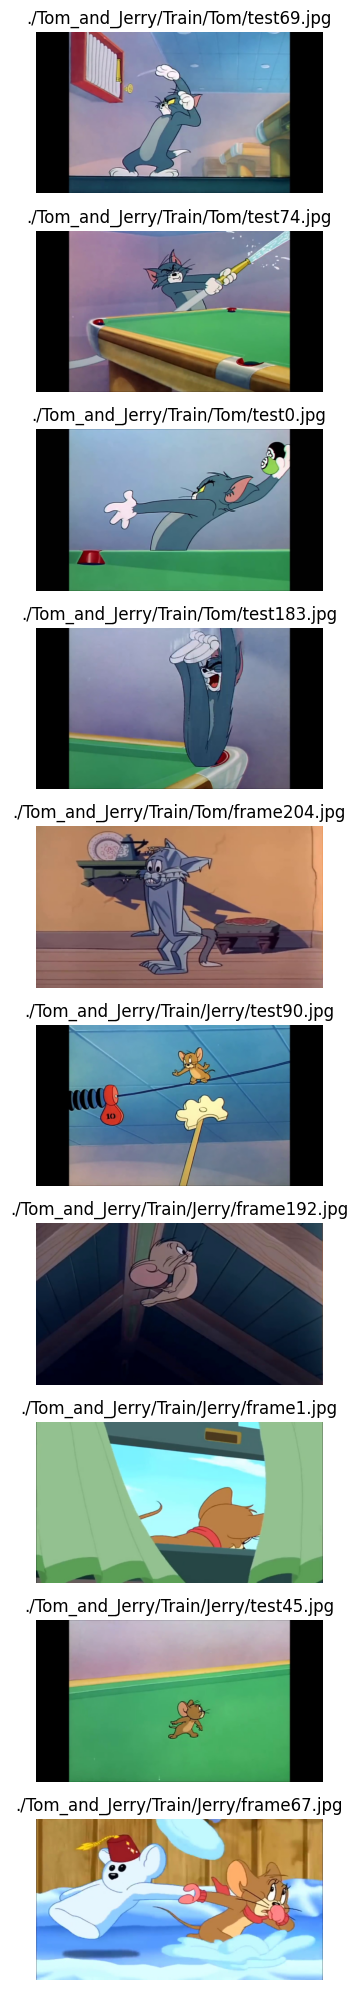

In [223]:
# Número de imágenes a seleccionar de cada clase
num_images_per_class = 5

# Obtener rutas de archivo aleatorias de imágenes de entrenamiento de cada clase
train_image_paths = []
for class_name in classes:
    class_image_paths = [os.path.join(train_dir, class_name, filename) for filename in os.listdir(os.path.join(train_dir, class_name))]
    random.shuffle(class_image_paths)
    train_image_paths.extend(class_image_paths[:num_images_per_class])

# Obtener rutas de archivo aleatorias de imágenes de prueba de cada clase
test_image_paths = []
for class_name in classes:
    class_image_paths = [os.path.join(test_dir, class_name, filename) for filename in os.listdir(os.path.join(test_dir, class_name))]
    random.shuffle(class_image_paths)
    test_image_paths.extend(class_image_paths[:num_images_per_class])

# Cargar y mostrar imágenes de entrenamiento con sus rutas de archivo correspondientes
sample_train_images = [Image.open(path) for path in train_image_paths]
display_images_with_paths(sample_train_images, train_image_paths)


In [224]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (640, 480, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

/usr/local/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [225]:
model_base.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 307200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    78,643,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,676,610 (300.13 MB)

 Trainable params: 78,676,610 (300.13 MB)

 Non-trainable params: 0 (0.00 B)

In [226]:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])


history = model_base.fit(
    train_generator, 
    epochs= 20, 
    validation_data = validation_generator
)

Epoch 1/20


/usr/local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 872ms/step - accuracy: 0.4862 - loss: 80.9417 - val_accuracy: 0.4286 - val_loss: 9.2979
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 789ms/step - accuracy: 0.5251 - loss: 24.9600 - val_accuracy: 0.7143 - val_loss: 2.0393
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 794ms/step - accuracy: 0.5921 - loss: 10.2180 - val_accuracy: 0.4286 - val_loss: 5.0089
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 812ms/step - accuracy: 0.5938 - loss: 6.1922 - val_accuracy: 0.7143 - val_loss: 4.1351
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 823ms/step - accuracy: 0.5791 - loss: 12.0925 - val_accuracy: 0.4286 - val_loss: 10.4426
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 782ms/step - accuracy: 0.5447 - loss: 17.9048 - val_accuracy: 0.4286 - val_loss: 4.4812
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 792ms/step - accuracy: 0.5403 - loss: 14.1298 - val_accuracy: 0.5714 - val_loss: 14.6132
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 786ms/step - accuracy: 0.5624 - loss: 15.1505 - val_accuracy: 0.5714 - val_loss: 3

In [227]:
results = model_base.evaluate(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step - accuracy: 0.7381 - loss: 1.9880


In [273]:
def display_images_with_predictions(images, image_paths, model, classes):
    for image, image_path in zip(images, image_paths):
        img = image.resize((640, 480))
        img_array = np.array(img)
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        img_array = np.expand_dims(img_array, axis=3)
        img_array = img_array[..., 0:1]  # Keep only one channel

        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction[0])
        predicted_class = classes[predicted_class_index]

        plt.imshow(image)
        plt.title(f"Prediction: {predicted_class}")
        plt.text(0, 20, f"File Path: {image_path}", fontsize=8, color='white')
        plt.axis('off')
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


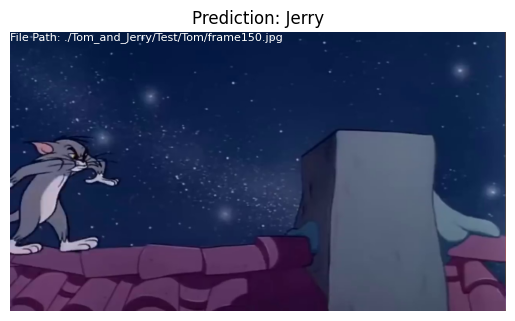

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


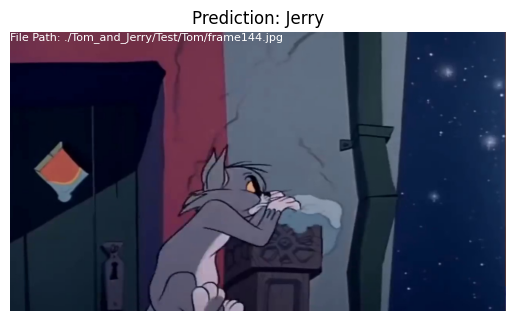

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


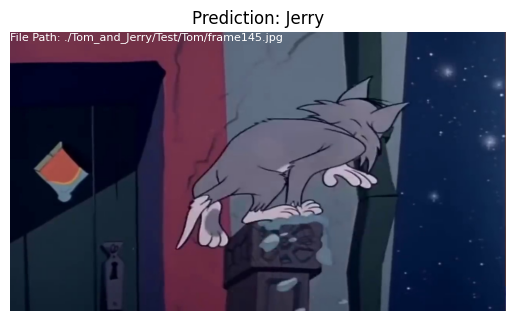

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


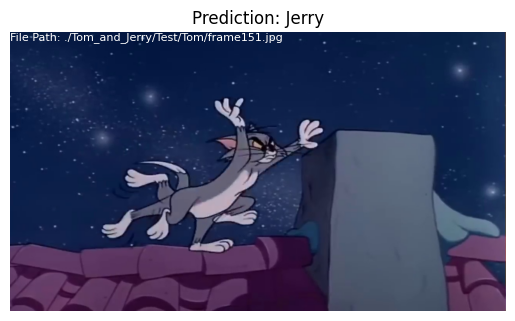

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


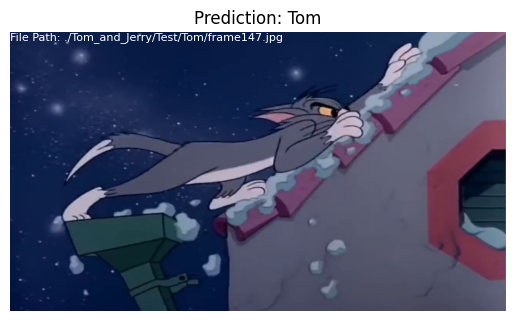

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


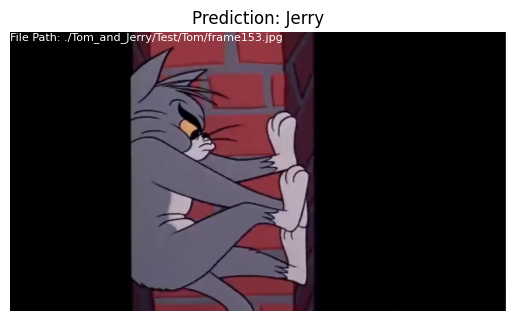

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


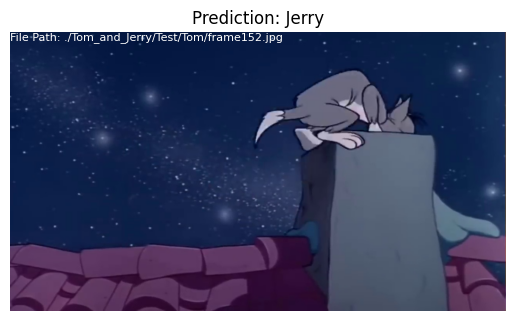

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


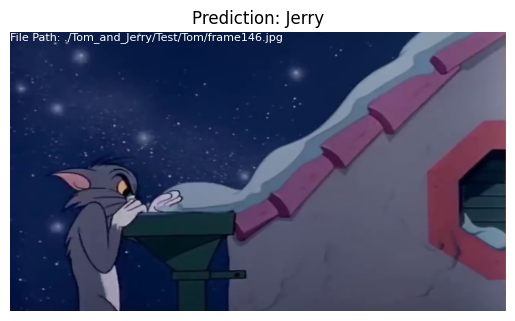

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


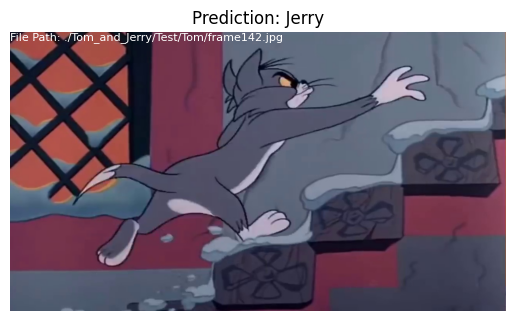

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


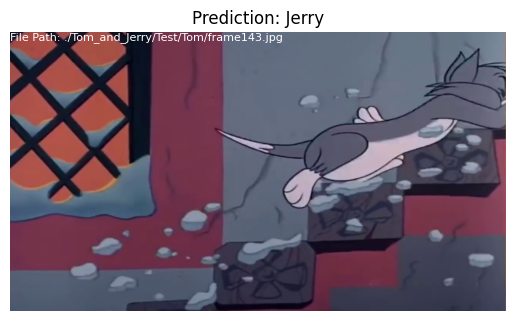

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


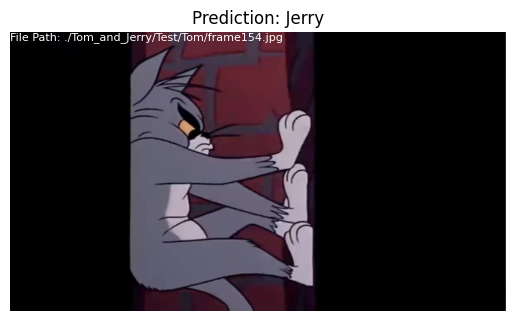

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


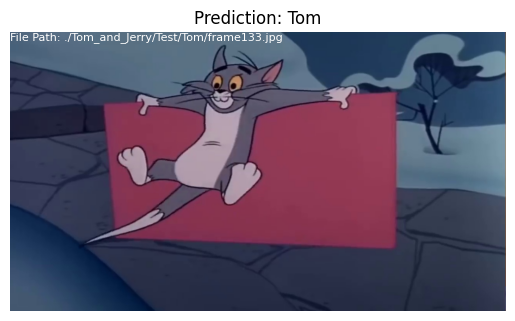

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


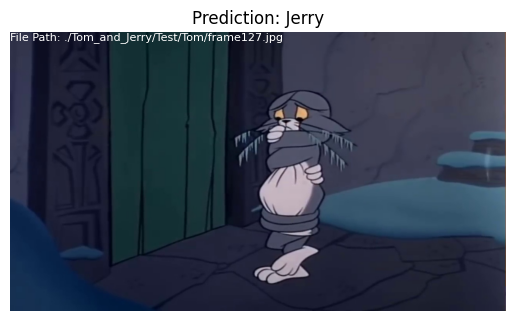

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


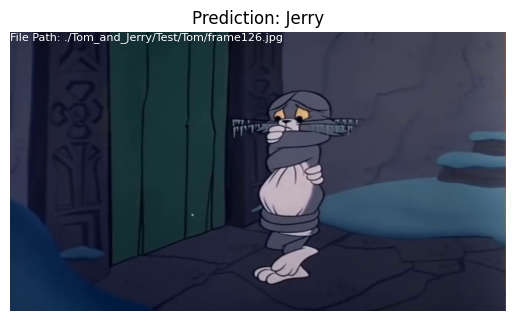

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


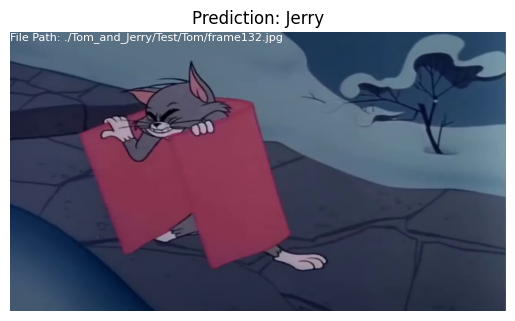

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


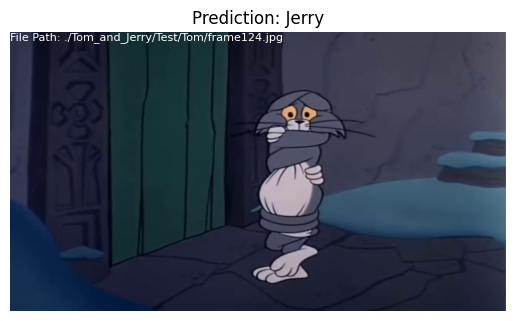

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


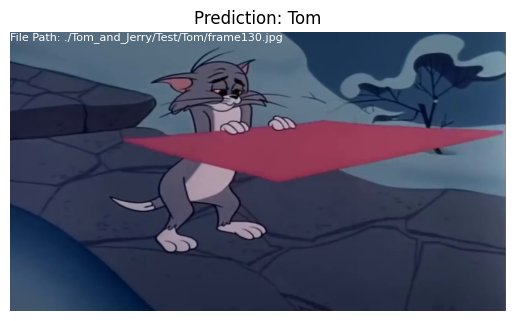

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


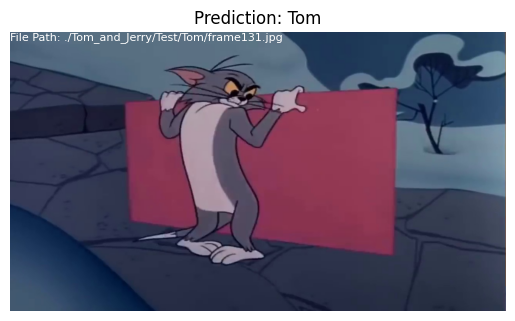

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


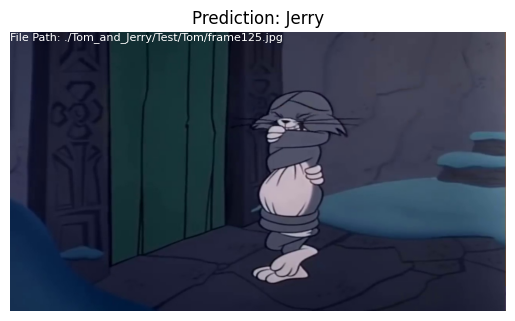

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


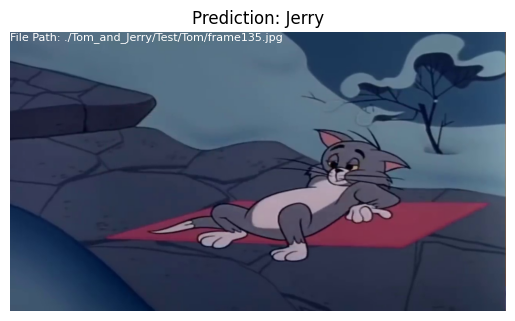

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


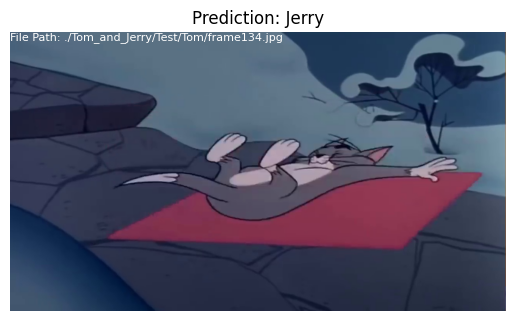

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


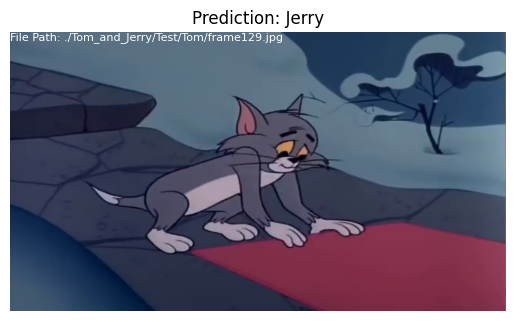

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


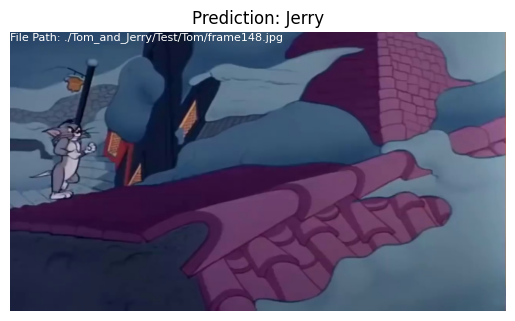

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


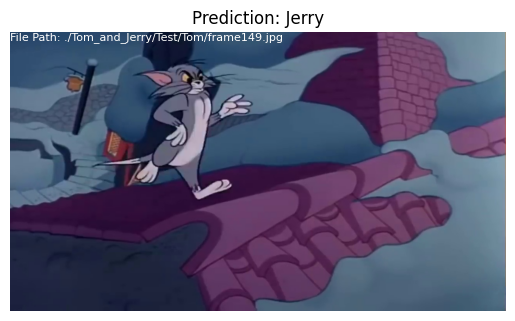

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


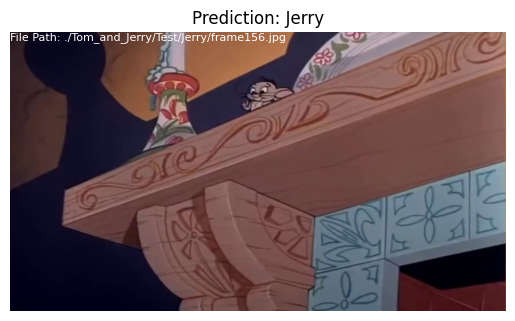

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


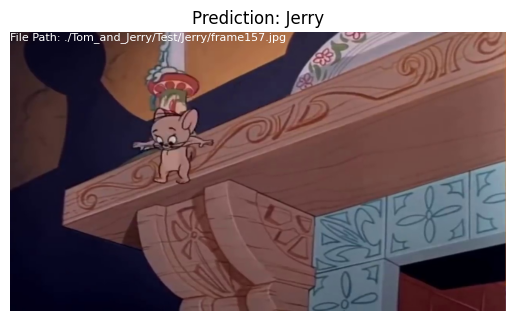

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


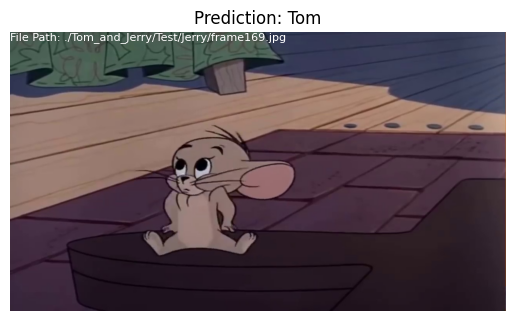

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


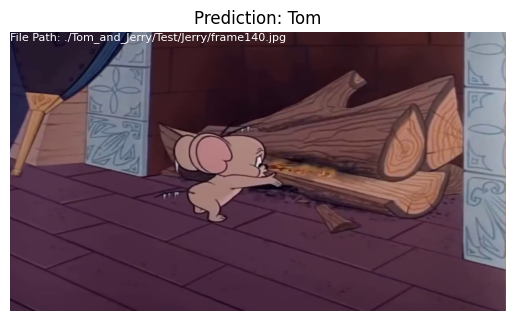

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


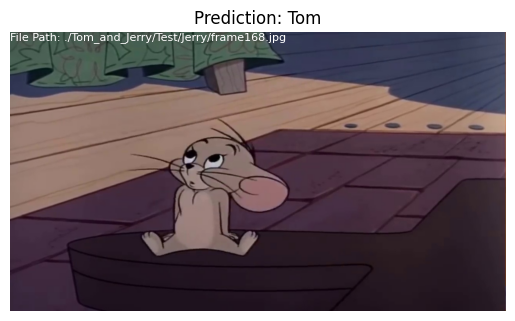

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


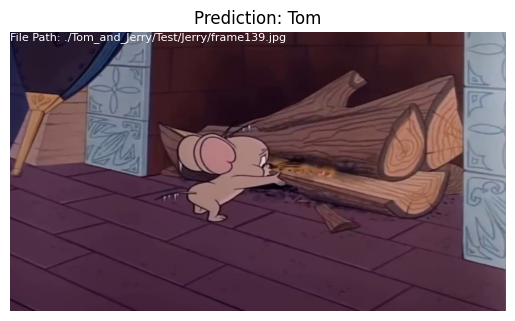

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


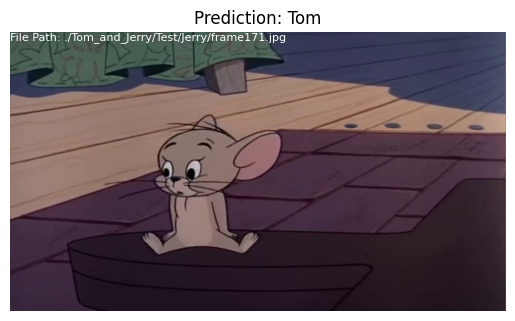

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


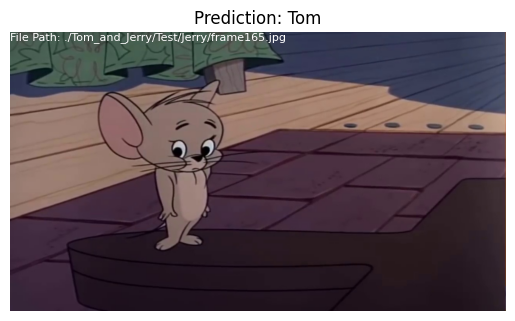

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


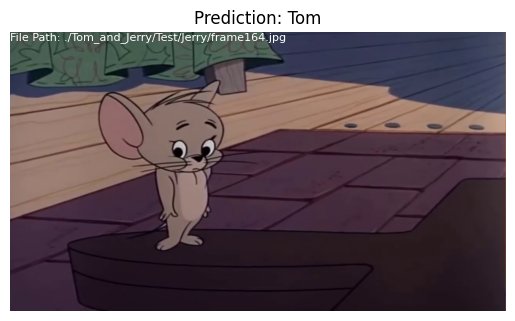

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


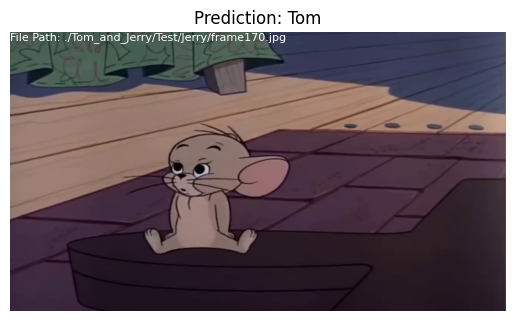

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


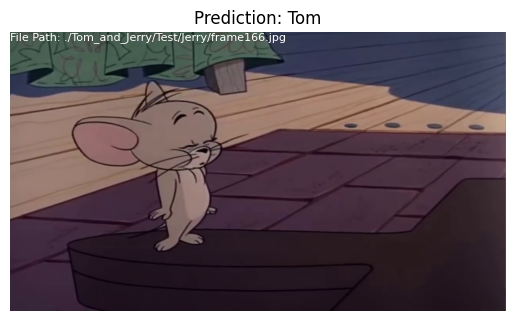

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


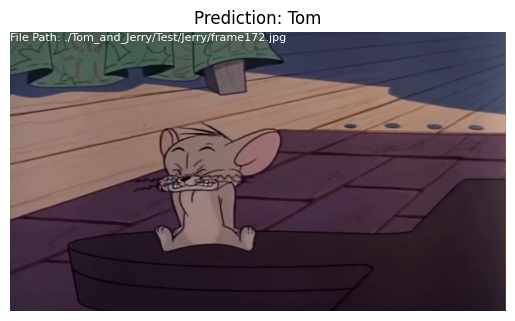

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


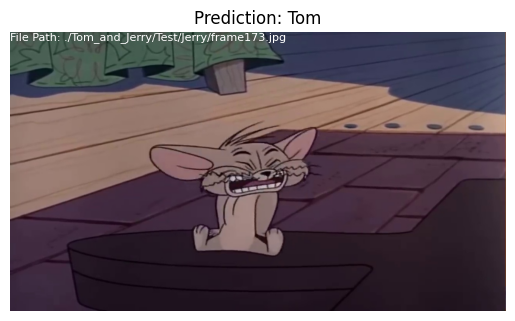

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


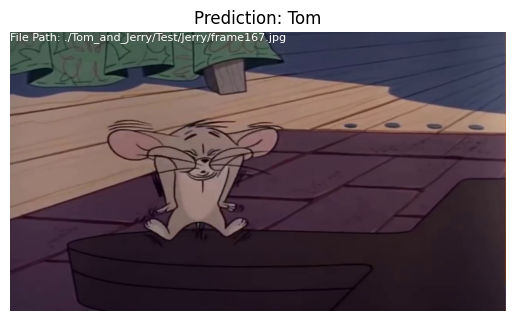

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


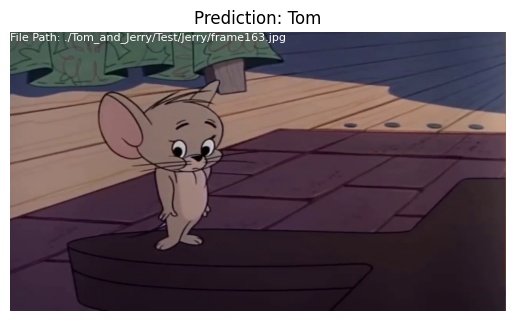

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


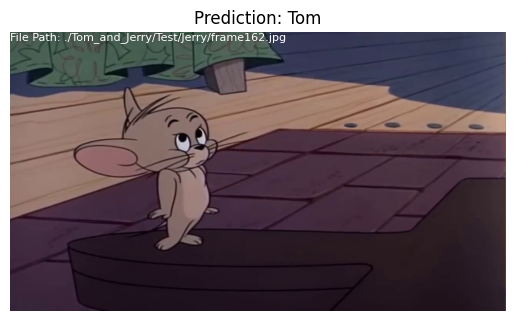

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


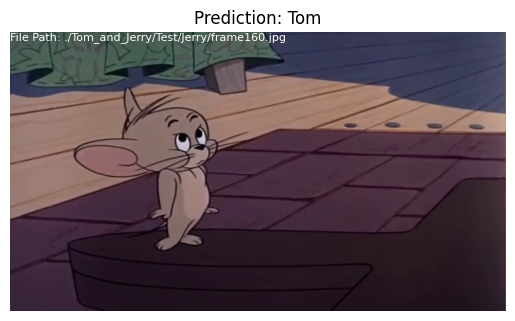

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


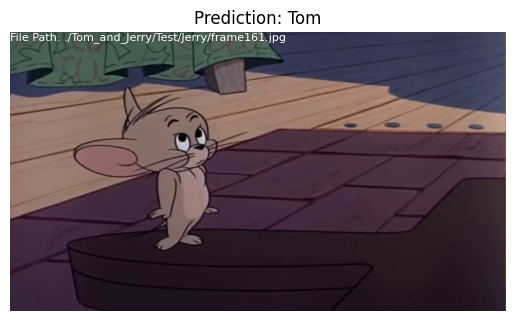

In [274]:
# Cargar y mostrar imágenes de entrenamiento con sus rutas de archivo correspondientes
sample_test_images = [Image.open(path) for path in test_image_paths]
display_images_with_predictions(sample_test_images, test_image_paths, model_base, classes)